# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('SINASC_RO_2019.csv', sep=',')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [119]:
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'cat_apgar'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'cat_apgar'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'cat_apgar'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'cat_apgar'] = 'normal'
df.loc[(df['APGAR5'] < 0) | (df['APGAR5'] > 10), 'cat_apgar'] = None
df['cat_apgar'].value_counts()

cat_apgar
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

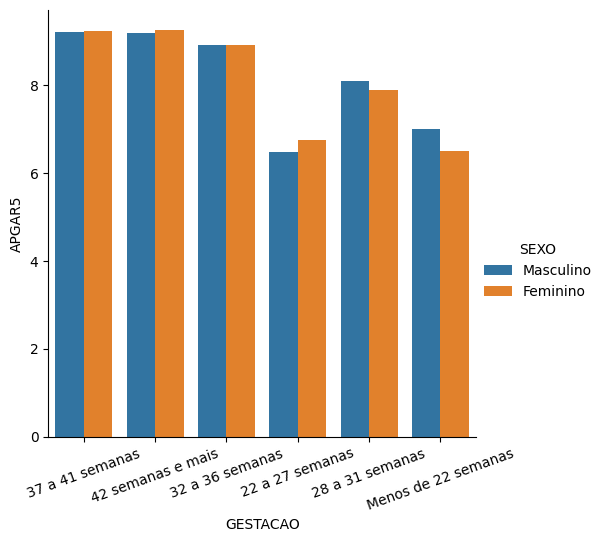

In [120]:
sns.catplot(x = 'GESTACAO',
            y = 'APGAR5',
            hue = 'SEXO',
            data = df,
            kind = 'bar',
            errorbar = None
            ).tick_params(axis = 'x', rotation = 20)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [121]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(freq)
print(freq.sum(axis=1))


APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  
GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [124]:
freq_pct_lin = freq.div(freq.sum(axis=1), axis = 0)
print(freq_pct_lin)


APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

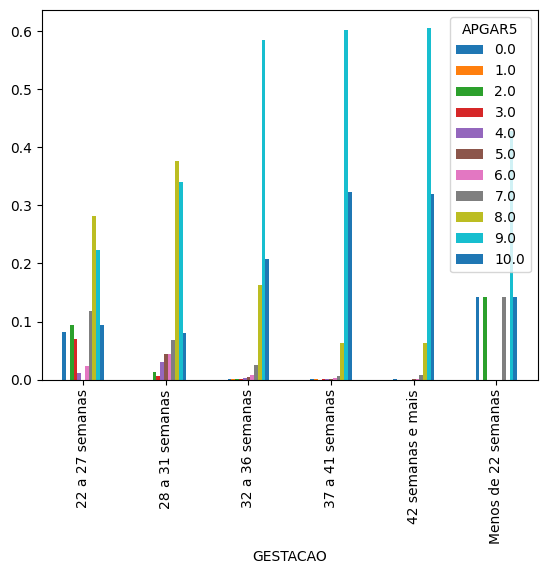

In [125]:
freq_pct_lin.plot.bar()
## A análisar o gráfico, vemos que os maiores casos onde o APGAR é baixo, são nos bebês que tem menos do que 37 meses,
## ou seja, estão com menos saúde ao nascer.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

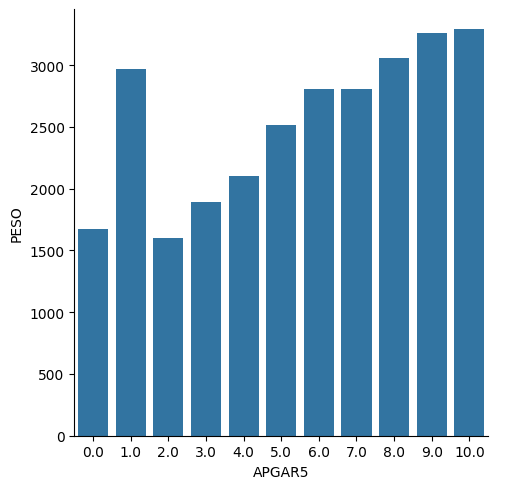

In [131]:
sns.catplot(data=df,
            x = 'APGAR5',
            y = 'PESO',
            kind = 'bar',
            errorbar= None
            )

## Aqui podemos ver mais claramente ainda que os bebês com o menro apgar normalmente são prematuros e/ou tem um peso menor, temos uma variação quando o apgar é 1, que é asfixia grave, que também
## pode ser ocasionado até pelo excesso de peso, olhando apenas este gráfico.